In [4]:
#!pip install os
!pip install pandas
#pip install opencv-python
!pip install --upgrade pip opencv-python
#apt-get update
#apt-get install -y libsm6 libxext6 libxrender-dev
#pip install opencv-python
!pip install opencv-python-headless
!pip install tensorflow-gpu

import numpy as np
import tensorflow.compat.v1  as tf
from tensorflow.keras.callbacks import TensorBoard
import pandas as pd
import cv2

Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:852)'),)) - skipping
Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (20.2.2)
Could not fetch URL https://pypi.org/simple/opencv-python/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/opencv-python/ (Caused by SSLError(SSLError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:852)'),)) - skipping
Requirement already up-to-date: opencv-python in /usr/local/lib/python3.6/dist-packages (4.4.0.42)


In [5]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Instructions for updating:
non-resource variables are not supported in the long term
Num GPUs Available:  1


In [6]:
from tensorflow.python.client import device_lib

In [7]:
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 629952547403667702
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 6647483241579045420
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 7466807294718340182
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3310157824
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7455291883993947849
physical_device_desc: "device: 0, name: GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [8]:
#gpu_options=tf.GPUOptions(per_process_gpu_memory_fraction=0.3333)]
NUM_THREADS=4

config = tf.ConfigProto(device_count = {'GPU': 60 , 'CPU': 56} )#device_count = {'GPU': 20 , 'CPU': 56} ) #intra_op_parallelism_threads=NUM_THREADS)# 
sess = tf.Session(config=config) 
#sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) 
tf.compat.v1.keras.backend.set_session(sess)

/tf/tensorflow-tutorials/Modelo_classificador_imagens/IMAGENS_SOMADAS_4_CICLOS
107_0_2440.png


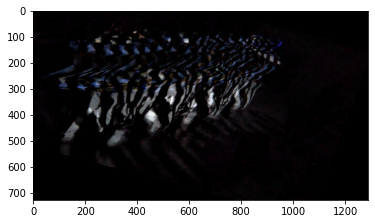

In [9]:
import os
import matplotlib.pyplot as plt
#DATADIR = "/home/Julian/docker/ifes-2019-09-09/Modelos_para_treinamento/Modelo_classificador_imagens/IMAGES/"
DATADIR = "/tf/tensorflow-tutorials/Modelo_classificador_imagens/IMAGENS_SOMADAS_4_CICLOS"
#cwd = os.getcwd()  # Get the current working directory (cwd)
#files = os.listdir(cwd)  # Get all the files in that directory
#DATADIR= files+list("")
#DATADIR=str(DATADIR)
#DATADIR= os.path.dirname(os.path.abspath("__file__"))
#DATADIR = os.path.join(DATADIR, 'clasiificador movimentos.ipynb/IMAGES')
#DATADIR=str(DATADIR)
print((DATADIR))

CATEGORIES = ["CERTO_GERADAS_2", "ERRADO_GERADAS_2"]

for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path):  
        print(img)
        img_array = cv2.imread(os.path.join(path,img))# ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  

        break  
    break  

[[1 1 1]
 [3 2 2]
 [3 2 3]
 ...
 [0 0 0]
 [0 0 0]
 [0 0 0]]
728
(728, 1288, 3)


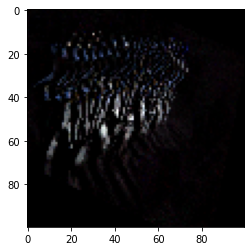

In [10]:
#Array de cada imagem
print(img_array[1])

#tamanho do vetor
print(len(img_array))

#Dimensão da imagem
print(img_array.shape)

#Novo formato das imagens
IMG_SIZE=100
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [11]:
#Normalizar os vetores

validacao=(img_array/255)
treino=(img_array/255)

In [12]:

!pip install tqdm

from tqdm import tqdm

training_data=[]

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to right and wrong
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=right 1=wrong

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 19352/19352 [09:28<00:00, 34.05it/s]

39874


In [13]:
import random

random.shuffle(training_data)

In [14]:
for sample in training_data[:10]:
    print(sample[1])

0
0
1
0
1
1
1
0
0
1


In [15]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print(len(X), len(y))

[[[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]]
39874 39874


In [16]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [17]:
!pip install keras

In [18]:
!pip install sklearn

In [19]:
!rm -rf ./logs/

In [20]:

import tensorflow as tf
import time

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import tensorflow.keras.layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import numpy as np
import keras
#from keras.backend.tensorflow_backend import set_session
from keras import regularizers
import sklearn
from sklearn.model_selection import train_test_split


pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)
                    
pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

y=np.array(y)
X = X/255.0

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
#x_test,x_val,y_test,y_val=train_test_split(x_test,y_test,test_size=0.5)

#print(len(x_test), len(y_test), len(x_train),len(y_train))
#print(X.shape[1:])

In [21]:
tempo_inicial=time.time()

In [22]:

NAME = "Movimento certo x Movimento errado-{}".format(int (time.time()))

IMG_SIZE=75
mult=IMG_SIZE*IMG_SIZE
model = keras.Sequential([
    keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=X.shape[1:]),#(IMG_SIZE, IMG_SIZE, 3)),
    keras.layers.MaxPooling2D(),
    
    keras.layers.Conv2D((2*IMG_SIZE), (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(),
    
    keras.layers.Conv2D((2*IMG_SIZE), (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(),
    
    keras.layers.Flatten(),
    keras.layers.Dense((2*IMG_SIZE), activation='relu',kernel_regularizer=regularizers.l2(0.00001)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.00001)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

model.compile(loss='binary_crossentropy',# tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              optimizer='adam',
              metrics=['accuracy',keras.metrics.Recall(),keras.metrics.Precision()])

hist= model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_test, y_test),callbacks=[tensorboard])

Train on 27911 samples, validate on 11963 samples
Epoch 1/20
27911/27911 [==============================] - ETA: 0s - loss: 0.4971 - acc: 0.7522 - recall: 0.6682 - precision: 0.7893WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training_v1.py:2048: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
27911/27911 [==============================] - 50s 2ms/sample - loss: 0.4971 - acc: 0.7522 - recall: 0.6682 - precision: 0.7893 - val_loss: 0.3237 - val_acc: 0.8585 - val_recall: 0.8196 - val_precision: 0.8799
Epoch 2/20
27911/27911 [==============================] - 49s 2ms/sample - loss: 0.3230 - acc: 0.8622 - recall: 0.8085 - precision: 0.8977 - val_loss: 0.2590 - val_acc: 0.8893 - val_recall: 0.8338 - val_precision: 0.9305
Epoch 3/20
27911/27911 [==========

In [23]:
print(time.time()-tempo_inicial)

994.0080184936523


In [24]:
model.evaluate(x_train,y_train)

[0.02849005772641939, 0.9972054, 0.99977875, 0.9944974]

In [25]:
model.evaluate(x_test,y_test)

[0.09733486754151328, 0.9739196, 0.9851545, 0.961908]

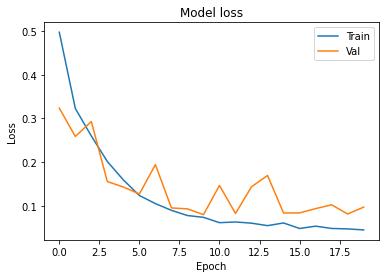

In [26]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.savefig("Model loss.png")
plt.show()

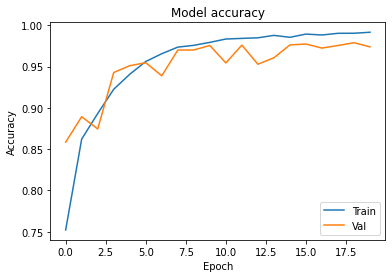

In [27]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.savefig("Accuracy.png")
plt.show()

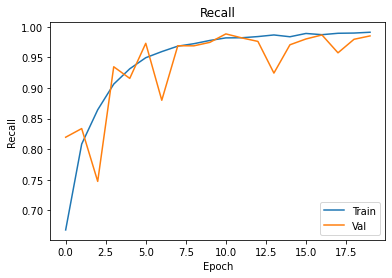

In [29]:
plt.plot(hist.history['recall'])
plt.plot(hist.history['val_recall'])
plt.title('Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.savefig("Recall.png")
plt.show()

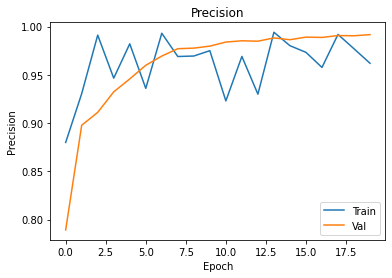

In [30]:
plt.plot(hist.history['val_precision'])
plt.plot(hist.history['precision'])
plt.title('Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.savefig("Precision.png")
plt.show()

In [31]:
model.save("Modelo_movimento_certo_e_errado_IMAGENS_SOMADAS_4_CICLOS")

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 150)       86550     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 150)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 150)       202650    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 150)       0         
_________________________________________________________________
flatten (Flatten)            (None, 15000)             0

In [ ]:
model.predict(x_test[1:2])

In [ ]:

##def prepare(filepath):
##    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
##    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
#    return new_array.reshape(-1,IMG_SIZE, IMG_SIZE, 1)

#filepath='0'
#img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
#print(img_array)
#new_array = (cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)))/255
#print(new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1))
##modelo_final = tf.keras.models.load_model("Modelo_movimento_certo_e_errado_IMAGENS_SOMADAS_4_CICLOS")

##prediction = model.predict([prepare(filepath)])
##print(prediction)  # will be a list in a list.
##print(CATEGORIES[int(prediction[0][0])])
##img_array=[prepare(filepath)]
##print(img_array)
##new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
##plt.imshow(new_array, cmap='gray')
##plt.show()